In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from __future__ import print_function

In [3]:
def reorder_matrix(ndarr):
    if ndarr.shape != (11, 11):
        return np.array([0], dtype=np.float)
    mid_arr = np.zeros((11, 11), dtype=np.float)
    new_arr = np.zeros((11, 11), dtype=np.float)
    mid_arr[0, :] = ndarr[0, :]
    mid_arr[1, :] = ndarr[1, :]
    mid_arr[2, :] = ndarr[6, :]
    mid_arr[3, :] = ndarr[2, :]
    mid_arr[4, :] = ndarr[7, :]
    mid_arr[5, :] = ndarr[3, :]
    mid_arr[6, :] = ndarr[8, :]
    mid_arr[7, :] = ndarr[4, :]
    mid_arr[8, :] = ndarr[9, :]
    mid_arr[9, :] = ndarr[5, :]
    mid_arr[10, :] = ndarr[10, :]
    new_arr[:, 0] = mid_arr[:, 0]
    new_arr[:, 1] = mid_arr[:, 1]
    new_arr[:, 2] = mid_arr[:, 6]
    new_arr[:, 3] = mid_arr[:, 2]
    new_arr[:, 4] = mid_arr[:, 7]
    new_arr[:, 5] = mid_arr[:, 3]
    new_arr[:, 6] = mid_arr[:, 8]
    new_arr[:, 7] = mid_arr[:, 4]
    new_arr[:, 8] = mid_arr[:, 9]
    new_arr[:, 9] = mid_arr[:, 5]
    new_arr[:, 10] = mid_arr[:, 10]
    return new_arr

In [4]:
arr = np.load('perfmat1476908097.npy')
print(arr.shape)

(67, 67)


In [5]:
if arr.shape[0] == 11:
    arr = reorder_matrix(arr)

In [6]:
arr

array([[  1.95000000e+02,   1.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   3.98000000e+03],
       [  4.00000000e+01,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   8.00000000e+00],
       [  3.10000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.10000000e+01],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          8.99000000e+02,   1.76000000e+02,   3.90000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.67000000e+02,   8.39000000e+02,   2.27000000e+02],
       [  1.60000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          5.00000000e+01,   1.37000000e+02,   1.66009000e+05]], dtype=float32)

In [7]:
plot_type = 'energy_and_time_tensor_me1Bmc_67planecodes'

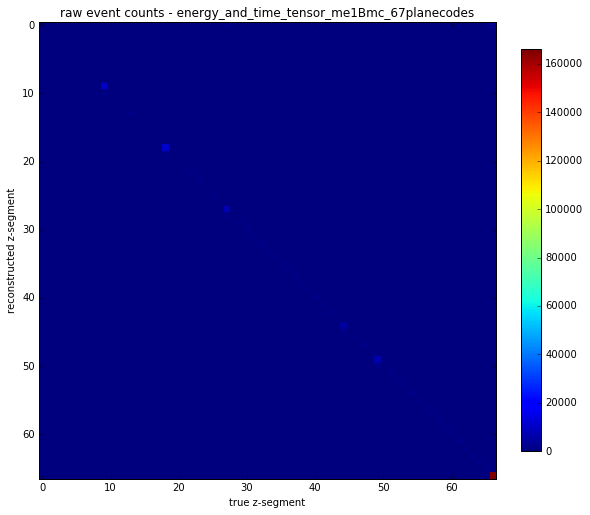

In [8]:
fig = plt.figure(figsize=(9, 9))
ax = plt.gca()
im = ax.imshow(arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
cbar = plt.colorbar(im, fraction=0.04)
plt.title('raw event counts - {}'.format(plot_type))
plt.xlabel('true z-segment')
plt.ylabel('reconstructed z-segment')

fig.savefig('raw_confusion_matrix_{}.pdf'.format(plot_type))

In [9]:
pur_arr = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    pur_arr[i, :] = arr[i, :] / arr.sum(axis=1)[i]
    
eff_arr = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    eff_arr[:, i] = arr[:, i] / arr.sum(axis=0)[i]

/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


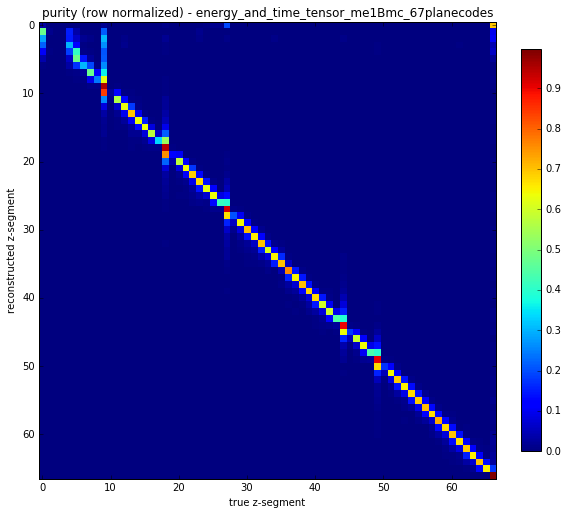

In [10]:
fig = plt.figure(figsize=(9, 9))
ax = plt.gca()
im = ax.imshow(pur_arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
cbar = plt.colorbar(im, fraction=0.04)
plt.title('purity (row normalized) - {}'.format(plot_type))
plt.xlabel('true z-segment')
plt.ylabel('reconstructed z-segment')

fig.savefig('normalized_by_row_confusion_matrix_{}.pdf'.format(plot_type))

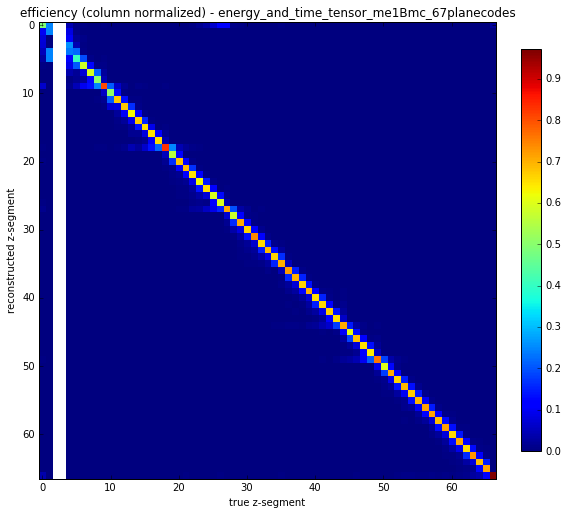

In [11]:
fig = plt.figure(figsize=(9, 9))
ax = plt.gca()
im = ax.imshow(eff_arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
cbar = plt.colorbar(im, fraction=0.04)
plt.title('efficiency (column normalized) - {}'.format(plot_type))
plt.xlabel('true z-segment')
plt.ylabel('reconstructed z-segment')

fig.savefig('normalized_by_col_confusion_matrix_{}.pdf'.format(plot_type))